In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

np.random.seed(0)
%matplotlib inline

In [2]:
import sys
sys.path.append('../src/')

from utils import gen_mask, coloring

In [5]:
n_sticks = 8
height = 256
width = 256

while True:
    img = np.ones((height, width), dtype=np.uint8) * 255
    ins = np.zeros((0, height, width), dtype=np.uint8)
    for _ in range(n_sticks):
        x = np.random.randint(30, 225)
        y = np.random.randint(30, 225)
        w = 15
        h = np.random.randint(80, 100)
        theta = np.random.randint(-90, 90)
        rect = ([x, y], [w, h], theta)
        box = np.int0(cv2.boxPoints(rect))

        gt = np.zeros_like(img)
        gt = cv2.fillPoly(gt, [box], 1)
        ins[:, gt != 0] = 0
        ins = np.concatenate([ins, gt[np.newaxis]])
        img = cv2.fillPoly(img, [box], 255)
        img = cv2.drawContours(img, [box], 0, 0, 2)

    if np.sum(np.sum(ins, axis=(1, 2)) < 400) == 0:
        break

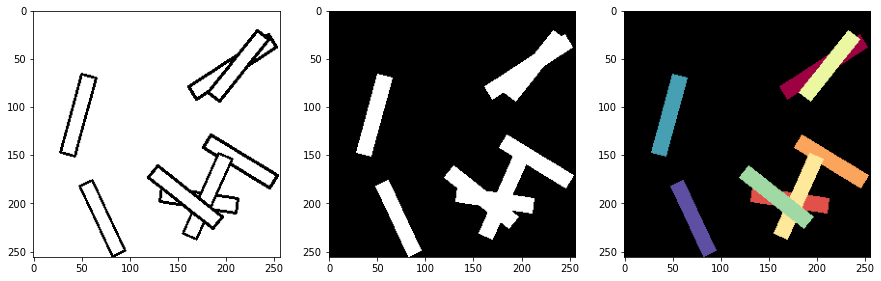

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
plt.gray()

axes[0].imshow(img)
axes[1].imshow(np.sum(ins, axis=0))
axes[2].imshow(coloring(gen_mask(ins)))